# 0. Tensorflow hub를 통해 모델 사용하기

MobileNet2 사용하기

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

#hub에 게시된 모델 사용 -> MobileNet을 사용하고자 한다.

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([
                             #이미지로서 3개의 채널값을 갖게 된다. (224 by 224)
                             #모델에 대해서 그대로 쓰냐 아니면 학습시킬꺼냐? -> trainable
                             hub.KerasLayer(handle = mobile_net_url, input_shape = (224,224,3), trainable=False)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [ ]:
from tensorflow.keras.applications import MobileNetV2

mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


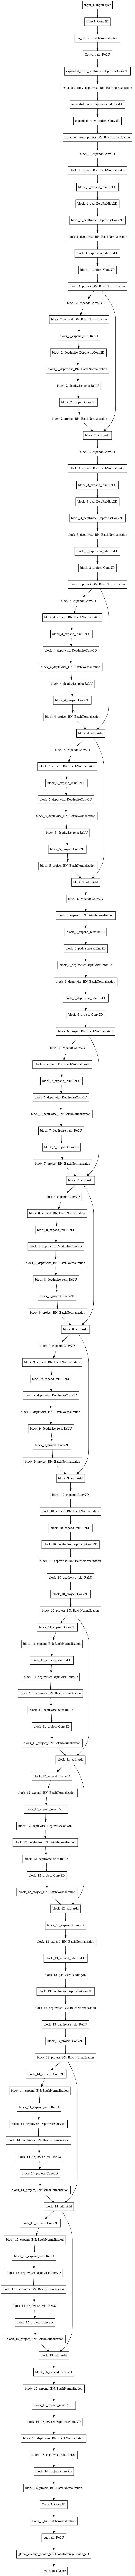

In [ ]:
tf.keras.utils.plot_model(mobilev2)
#어떻게 쌓였는지 본다. -> 일직선으로 쌓인 것이 아니라 분할되어 쌓여져 있다.

## MobileNet

imagenet에 존재하는 1000종류의 이미지를 분류 가능한 mobileNet

MoblieNet 성능 평가
- imageNet_V2를 사용하여 평가를 진행(imageNet의 데이터 중 일부만 모아놓은 것)

- tf.keras.utils.get_file(): 사전에 저장되어 있는 데이터를 불러올 수 있는 함수

  - extract = True: tar.gz형식의 압축파일이 자동으로 해제되어 구글 코렙 가상머신에 저장
  - origin: 저장 경로

- pathlib.Path(): 경로 설정 함수

MobileNet 정확도 확인
- Top-5 정확도 : 전동적으로 ImageNet 대회에서는 신경망이 예측하는 값 중 상위 5개 이내에 데이터의 실제 분류가 포함돼 있으면 정답인정

- Top-1 정확도 : 신경망이 예측하는 값 중 상위 1개 이내에 데이터의 실제 분류가 포함돼 있으면 정답으로 인정
•최초의 MobileNet 버전의 Top - 5 : 89.9% / Top - 1 : 70.9%

•(※ 참고 문헌 : http://bit.ly/2kzUU1F)

In [1]:
import os
import pathlib
import tensorflow as tf
content_data_url = '/content/sample_data'
data_root_orig = tf.keras.utils.get_file('imagenetV2','https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-top-images.tar.gz',cache_dir=content_data_url, extract=True)

data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-top-images-format-val')
# 데이터 경로의 이상유무 확인
print(data_root)
for idx, item in enumerate(data_root.iterdir()):
  print(item)
  if idx == 9:
    break

1245929472/1245927936 [==============================] - 57s 0us/step
/content/sample_data/datasets/imagenetv2-top-images-format-val
/content/sample_data/datasets/imagenetv2-top-images-format-val/718
/content/sample_data/datasets/imagenetv2-top-images-format-val/967
/content/sample_data/datasets/imagenetv2-top-images-format-val/904
/content/sample_data/datasets/imagenetv2-top-images-format-val/599
/content/sample_data/datasets/imagenetv2-top-images-format-val/909
/content/sample_data/datasets/imagenetv2-top-images-format-val/178
/content/sample_data/datasets/imagenetv2-top-images-format-val/55
/content/sample_data/datasets/imagenetv2-top-images-format-val/331
/content/sample_data/datasets/imagenetv2-top-images-format-val/424
/content/sample_data/datasets/imagenetv2-top-images-format-val/310


In [2]:
#라벨 정보 불러오기
label_file = tf.keras.utils.get_file(fname = 'label', origin = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
#빈 객체 생성
label_text = None

#text파일 열고 '읽기모드' 설정
with open(label_file, 'r') as f:
  #[:-1] 처음부터 끝까지 읽기.'\n' 줄바꿈 기준으로 나눔(split)
  label_text = f.read().split('\n')[:-1]

print(len(label_text))
print(label_text[:10])
print(label_text[-10:])


#nltk 패키지에서 wordnet을 다운받습니다.
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

#label_text로 전처리 과정
# wordnet과 인터넷에 올라온 label 텍스트는 조금씩 다르기 때문에 차이를 없애기 위해서 아래의 전처리 작업을 진행
label_text = [c.lower().replace('-','').replace('_','').replace(' ','') for c in label_text]
print(label_text[:10])
print(label_text[-10:])
#단어로 다 자름

16384/10484 [==============================================] - 0s 0us/step
1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['background', 'tench', 'goldfish', 'greatwhiteshark', 'tigershark', 'hammerhead', 'electricray', 'stingray', 'cock', 'hen']
['buckeye', 'coralfungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'henofthewoods', 'bolete', 'ear', 'toilettissue']


image_count: 10000


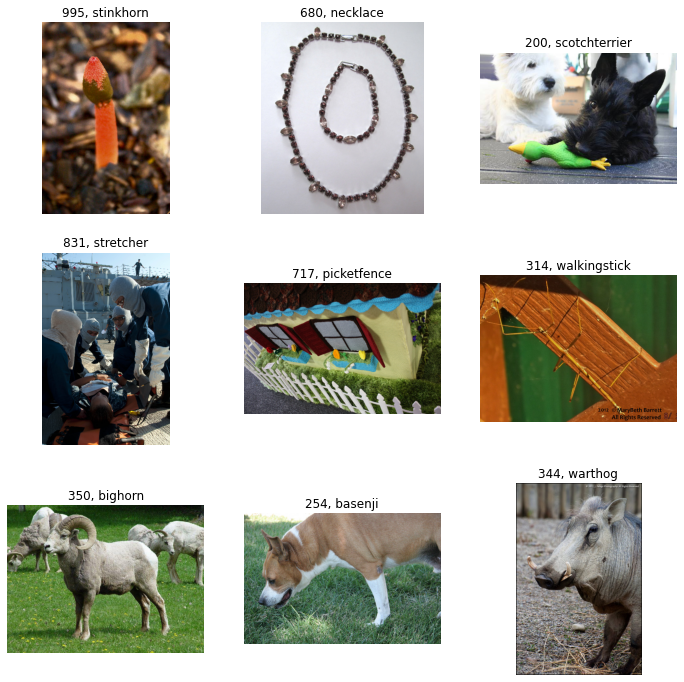

In [3]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

#listdir은 해당 경로의 파일/디렉터리 이름만 가져오지만 glob의 경우는 탐색한 경로를 함께 가져온다.
#'*/*' 모든 경로 및 파일
all_image_paths = list(data_root.glob('*/*'))
#위의 모든 경로 및 파일명을 문자화 시켜서 변수에 할당
all_image_paths = [str(path) for path in all_image_paths]

#이미지를 랜덤하게 섞습니다.
random.shuffle(all_image_paths)

#이미지의 총 수 확인
image_count = len(all_image_paths)
print('image_count:', image_count)


plt.figure(figsize=(12,12))
for c in range(9):
  # 이미지를 랜덤으로 추출
  image_path = random.choice(all_image_paths)
  #차례로 출력
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread(image_path))
  
  #첫 번째 부터 1000번째 까지의 라벨과 텍스트가 동일한 값을 갖도록 코딩
  #하나씩 분리하여 출력하며 이해

  idx = int(image_path.split('/')[-2]) + 1
  #1부터 시작했을 때 어디에 index를 두는 사진인지 보여줌
  
  #상단의 이름 출력
  plt.title(str(idx) + ', ' + label_text[idx])
  plt.axis('off')
plt.show()

ImageNet 대회에서는 네트워크가 예측하는 값 중 상위 5개 이내에 데이터의 실제 분류가 포함돼 있으면 정답으로 하는 TOP-5정확도를 분류 정확도로 측정

In [7]:
import cv2
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'
model = tf.keras.Sequential([
    hub.KerasLayer(handle = url, input_shape = (224, 224, 3), trainable = False)
])

#빈 객체 생성
top_1 = 0
top_5 = 0

# all_image_paths에 저장되어 있는 경로를 하나씩 불러오며 반복
for image_path in all_image_paths[:]:
  #cv2.imread() : 사진 읽어들이기
  img = cv2.imread(image_path)
  
  #cv2.resize() : 사진 크기 재조정 (픽셀 통일)
  img = cv2.resize(img, dsize=(224, 224))

  # 최소 최대 정규화(normalization기법) (입력값-최소값(0)/최댓값(255)-최소값(0))
  #사진인데 정규화 시키는 이유 : 사진도 숫자다.
  img = img / 255.0
  #np.expand_dims( axis = 0 ) : 첫 번째 차원 추가
  #3개 차원이다 사진은 -> (224,224,3) -> 3번째는 채널값으로 RGB는 보통 3, 흑백은 0?
  img = np.expand_dims(img, axis=0) # 차원 추가! -> 이미지에 대한 전처리 기법
  
  #예측값에 대한 순위 정보[0]를, argsort()로 index 정렬(오름차순)
  #[::-1] Extended Slices 기법([::-1]로 내림차순)으로 내림차순으로 변경, [:5] 그 중 top 5개(앞에 있는 5개)
  top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
  
  #라벨링 번호 도출
  idx = int(image_path.split('/')[-2])+1
  # 신경망은 반복문을 타고 넘어온 n번째 img를 가지고 예측을 수행해서 5개의 TOP 후보(top_5_predict)를 추렸습니다.
  # 만약 이 n번째 img가 신경망이 가장 높게 예측한 후보 5개 안에 들어있다면은,
  if idx in top_5_predict:
    # top_5 에 1 추가
    top_5 += 1
    # 또 만약에 가장 높게 예측한 것[0]과 idx과 같다면은
    if top_5_predict[0] == idx:
      #top_1 에 1을 추가
      top_1 += 1

#최종 출력
# 정확하게 예측한 경우 / 전체 사진 수
print('TOP - 5 정확성 :', top_5 / len(all_image_paths) * 100, '%')
print('TOP - 1 정확성 :', top_1 / len(all_image_paths) * 100, '%')

TOP - 5 정확성 : 83.52000000000001 %
TOP - 1 정확성 : 59.06 %


논문에서는 정확도를 높이기 위해 여러 가지 전처리 방법을 사용하지만 여기서는 특별한 방법을 사용하지 않았기에 정확도가 좀 낮다.

## MobileNet의 분류 및 실제 결과 확인

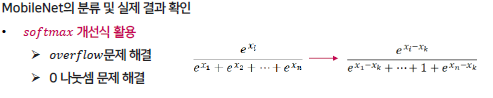

In [8]:
#softmax 개선식 활용용softmax 개선식 활용
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis = 0)

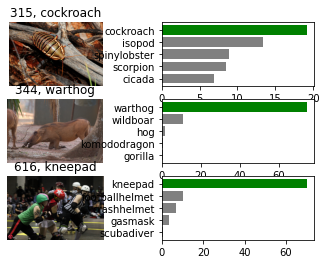

In [14]:
#3개에 대한 결과 표시시
for c in range(3):
  #전체 이미지 경로 중 하나 선택
  image_path = random.choice(all_image_paths)

  plt.subplot(3,2,c*2+1) #이미지 표시 (행,열,1,3,5)
  plt.imshow(plt.imread(image_path)) #이미지 출력
  idx=int(image_path.split('/')[-2])+1 #이미지 번호 변수화

  plt.title(str(idx) + ', '+label_text[idx])
  plt.axis('off')

  plt.subplot(3,2,c*2+2) # 예측값 표시 (행,열,2,4,6)
  img=cv2.imread(image_path) #이미지 읽기
  img=cv2.resize(img,dsize=(224,224))  # 이미지 크기 통일
  img=img/255.0 #이미지 정규화
  img=np.expand_dims(img,axis=0) #차원 추가

  logits = model.predict(img)[0] #MobileNet을 이용하여 예측한 값 저장
  prediction = softmax(logits) #예측 확률 출력

  top_5_predict = prediction.argsort()[::-1][:5] #가장 확률 높은 5개

  #top_5_predict를 가지고 라벨링 명으로 변환
  labels = [label_text[index] for index in top_5_predict]
  color = ['gray']*5

  if idx in top_5_predict:
    #top_5_predict를 리스트화시키고 그 안에 idx를 인덱스화 시켜 'x색'으로 바꿔준다.
    color[top_5_predict.tolist().index(idx)] = 'green'
  
  #Extended slices로 내림차순으로 변경 즉, 가장 상단에 'x색'이 오도록 함
  color = color[::-1]
  plt.barh(range(5),prediction[top_5_predict][::-1]*100,color=color) #가로 막대 그리기
  plt.yticks(range(5),labels[::-1])

